In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:

# Đọc dữ liệu từ file vào các DataFrame
df_vn = pd.read_csv('datasets/vn_chart.csv')
df_features = pd.read_csv('datasets/audio_features.csv')

# Sử dụng phương thức merge để lọc các dòng dữ liệu trong df_features dựa trên cột ID từ df_vn
df_vn_features = df_features.merge(df_vn[['id']], on='id', how='inner')
df_vn_features = df_vn_features.drop_duplicates().reset_index(drop=True)

In [47]:
df_vn_features

,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,tempo,duration_ms,time_signature,explicit,popularity,release_date,album_id,album_name,track_number,preview_url
0,3rUGC1vUpkDG9CZFHMur1t,0.750,0.733,6,-3.180,0,0.0319,0.25600,0.000000,0.1140,...,111.018,131872,1,True,92,2023-09-15,3UOV8XvCwMKaATRNXrYCjN,greedy,1,https://p.scdn.co/mp3-preview/ca7bdcb691fb64a5...
1,3vkCueOmm7xQDoJ17W1Pm3,0.504,0.308,9,-14.958,1,0.0321,0.86800,0.135000,0.1580,...,113.950,137773,4,False,86,2023-09-15,2Cn1d2KgbkAqbZCJ1RzdkA,The Land Is Inhospitable and So Are We,7,https://p.scdn.co/mp3-preview/2f90c9a6a2b6e385...
2,5v3J1lYjtJgEM1buAa1Oe5,0.886,0.388,9,-10.874,1,0.0498,0.07670,0.012300,0.1060,...,119.016,181513,4,False,52,2023-09-14,70ilvvEPW7LENYdB2Vj5rl,M.,1,https://p.scdn.co/mp3-preview/4d97d69cf58f23b8...
3,3MJhPqL2IgGs7gHEB2M35q,0.654,0.768,5,-5.007,1,0.0431,0.00616,0.000000,0.2020,...,104.970,162570,4,True,72,2022-09-16,7jaSNQUBJbvfbZHLNFrV7P,BORN PINK,5,https://p.scdn.co/mp3-preview/27158b0133d5035a...
4,0wwfocY1CfXcKfMcWSoGXc,0.450,0.395,3,-7.867,1,0.0366,0.61500,0.000003,0.1220,...,119.587,296000,3,False,57,2022-12-26,2C8r3XAx3RmXaEviV1ecfE,Vọng,4,https://p.scdn.co/mp3-preview/9e2317f285372db9...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,4NioO5R9sHEZh4cGzMHyNt,0.626,0.547,4,-8.285,1,0.0342,0.06560,0.000017,0.1490,...,109.946,279833,4,False,0,2023-10-26,64LU4c1nfjz1t4VnGhagcg,1989 (Taylor's Version),18,NaN
934,2ve0kuaWUCt4Zx8x4bf1MR,0.462,0.708,3,-5.971,1,0.0555,0.00933,0.000019,0.1980,...,183.811,245567,4,False,0,2023-10-26,64LU4c1nfjz1t4VnGhagcg,1989 (Taylor's Version),14,NaN
935,74X2u8JMVooG2QbjRxXwR8,0.697,0.820,5,-4.502,1,0.0308,0.10000,0.000000,0.0631,...,136.054,159080,4,False,75,2023-10-27,6Msc3BwzKZ5f5FXmKuUSu6,Perfect Night,1,https://p.scdn.co/mp3-preview/4e84e2dc9edab896...
936,1PKO2934seRIHqEKK0zf3S,0.508,0.136,6,-15.946,0,0.0716,0.15600,0.002040,0.1210,...,199.824,103937,4,False,44,2021-09-30,3nqVBBxgy9OUGzD71fnLQ8,Lả Lơi,1,https://p.scdn.co/mp3-preview/788f1d2127d41112...


In [48]:
df_vn_features.dtypes

id                   object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
explicit               bool
popularity            int64
release_date         object
album_id             object
album_name           object
track_number          int64
preview_url          object
dtype: object

In [49]:
df_vn_features['release_date'] = pd.to_datetime(df_vn_features['release_date'], format='%Y/%m/%d')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29492\215551831.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mtCor = df_vn_features.corr()
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial

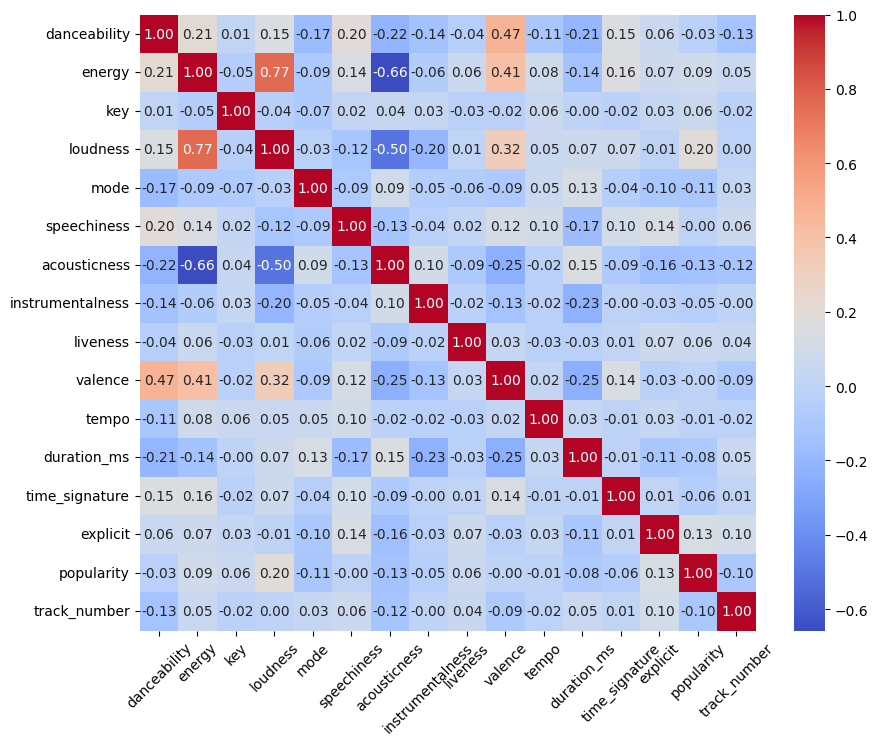

In [50]:
# Tính ma trận tương quan
mtCor = df_vn_features.corr()

# Vẽ biểu đồ
plt.figure(figsize=(10, 8))
sns.heatmap(mtCor, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.xticks(rotation=45)
plt.show()

- Có vẻ như năng lượng (energy) và độ ồn (loudness) có mối tương quan dương mạnh **0.77**. Khi một bản nhạc có năng lượng cao, người nghe cảm nhận được mức độ phấn khích và động lực lớn. Để tạo ra hiệu ứng này, âm thanh cần được làm to hơn và độ lớn âm thanh tăng lên.

- Ngoài ra, tính cảm tích cực (valence) có tương quan dương với khả năng khiêu vũ (danceability) **0.47** và năng lượng (energy) **0.41**. Tương quan giữa tính cảm tích cực, khả năng khiêu vũ và năng lượng trong bản nhạc thường là một yếu tố quan trọng trong việc tạo ra trải nghiệm âm nhạc tích cực, phấn khích, và thúc đẩy người nghe tham gia vào việc khiêu vũ và tận hưởng âm nhạc.

- Bên cạnh đó, mức độ acoustics (acousticness) có tương quan âm cao với năng lượng (energy) **-0.66** và độ lớn âm lượng (loundness) **-0.5**. Điều này cũng có thể lý giải cơ bản:
    - "Acousticness" thể hiện mức độ "tự nhiên" hoặc "acoustic" của một bản nhạc.
    - "Energy" thể hiện mức độ năng lượng trong một bản nhạc, đặc biệt là năng lượng mà người nghe cảm nhận được.
    - "Loudness" đo lường độ lớn của một bản nhạc, tức là mức độ tăng âm lượng.
    - Điều này cho thấy việc sử dụng các nhạc cụ thực (như guitar, piano) thay vì âm thanh tổng hợp hoặc công nghệ âm thanh, góp phần tạo ra một bản nhạc có tính chất yên bình, ít năng động và không cần tạo ra hiệu ứng âm thanh lớn.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the foll

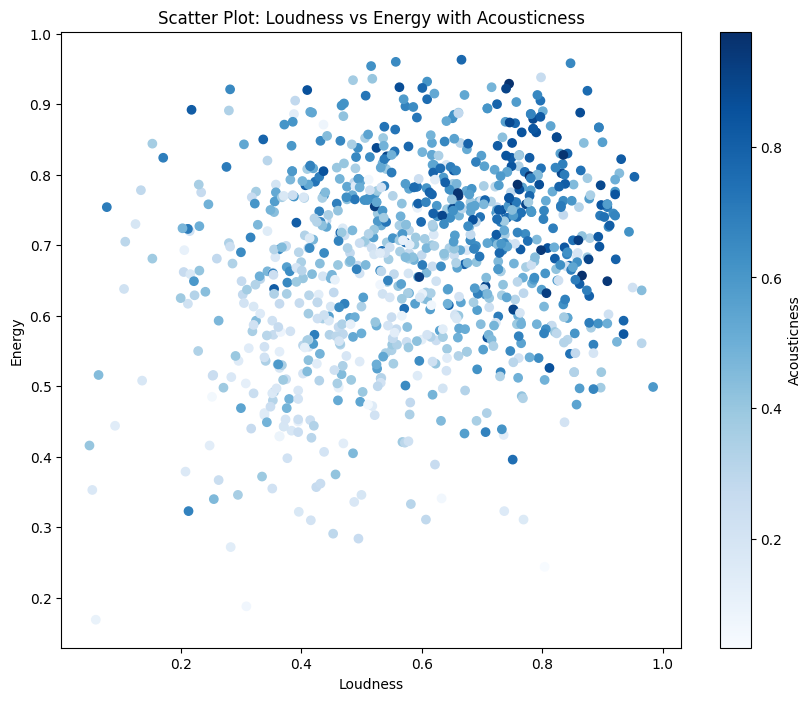

In [51]:
# Extract data for plotting
X = df_vn_features['energy']       # X-axis data: Loudness
Y = df_vn_features['danceability']         # Y-axis data: Energy
Z = df_vn_features['valence']   # Color data: Acousticness

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Create a scatter plot
sc = ax.scatter(X, Y, c=Z, cmap=plt.cm.Blues)

# Add a color bar to the plot to show the variation in acousticness
fig.colorbar(sc, ax=ax, label='Acousticness')

# Set labels for the X and Y axes
ax.set_xlabel('Loudness')  # Label for X-axis
ax.set_ylabel('Energy')    # Label for Y-axis

# Set the title of the plot
ax.set_title('Scatter Plot: Loudness vs Energy with Acousticness')

# Display the plot
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the foll

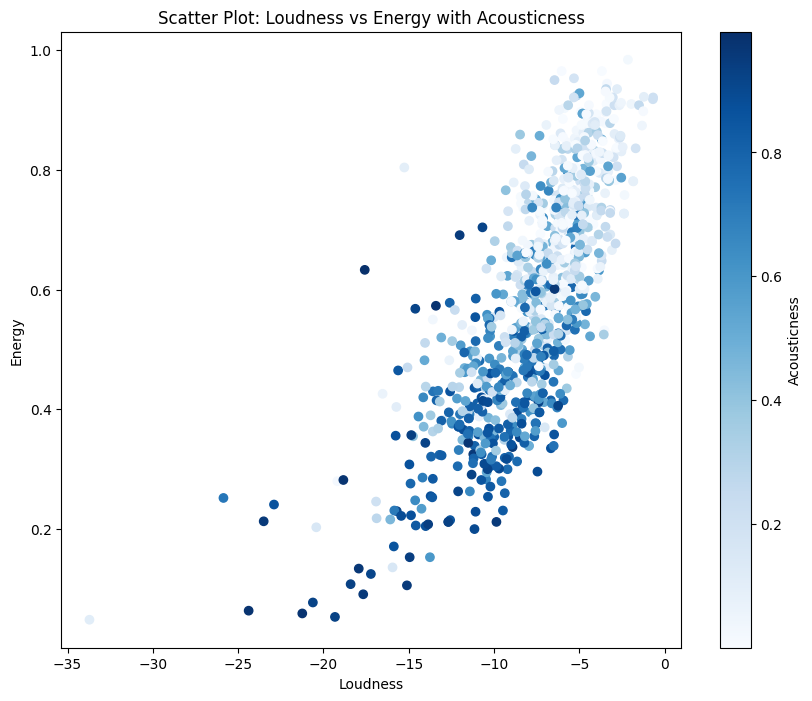

In [52]:
# Extract data for plotting
X = df_vn_features['loudness']       # X-axis data: Loudness
Y = df_vn_features['energy']         # Y-axis data: Energy
Z = df_vn_features['acousticness']   # Color data: Acousticness

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Create a scatter plot
sc = ax.scatter(X, Y, c=Z, cmap=plt.cm.Blues)

# Add a color bar to the plot to show the variation in acousticness
fig.colorbar(sc, ax=ax, label='Acousticness')

# Set labels for the X and Y axes
ax.set_xlabel('Loudness')  # Label for X-axis
ax.set_ylabel('Energy')    # Label for Y-axis

# Set the title of the plot
ax.set_title('Scatter Plot: Loudness vs Energy with Acousticness')

# Display the plot
plt.show()

In [53]:
def scatter_season_plot(data, x, y):
    # Chuyển cột thời gian sang định dạng datetime
    
    # Trích xuất thông tin mùa từ cột thời gian
    data['Season'] = df_vn_features['release_date'].dt.month.apply(lambda month: 
        'Spring' if 1 <= month <= 3 else
        'Summer' if 4 <= month <= 6 else
        'Autumn' if 7 <= month <= 9 else
        'Winter'
    )
    
    # Tạo biểu đồ phân tán cho từng mùa
    seasons = ['Spring', 'Summer', 'Autumn', 'Winter']
    plt.figure(figsize=(12, 8))
    
    for i, season in enumerate(seasons):
        plt.subplot(2, 2, i + 1)
        data_season = data[data['Season'] == season]
        plt.scatter(data_season[x], data_season[y], alpha=0.5)
        plt.title(season)
        plt.xlabel(x)
        plt.ylabel(y)
    
    plt.tight_layout()
    plt.suptitle(f'Scatter Plot of {x} vs. {y} by Season', fontsize=16)
    plt.show()




findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the foll

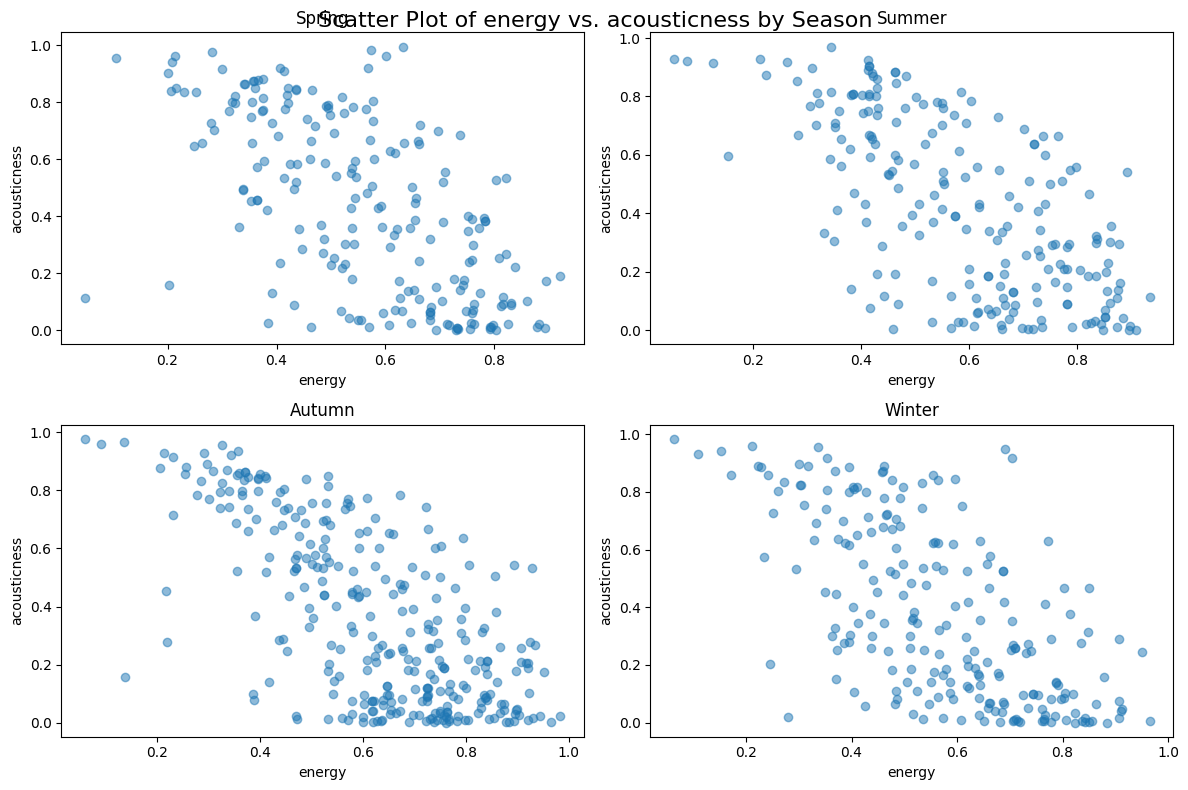

In [54]:
# Sử dụng hàm với dữ liệu và tên các biến x, y, và cột thời gian
scatter_season_plot(df_vn_features, 'energy', 'acousticness')

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the foll

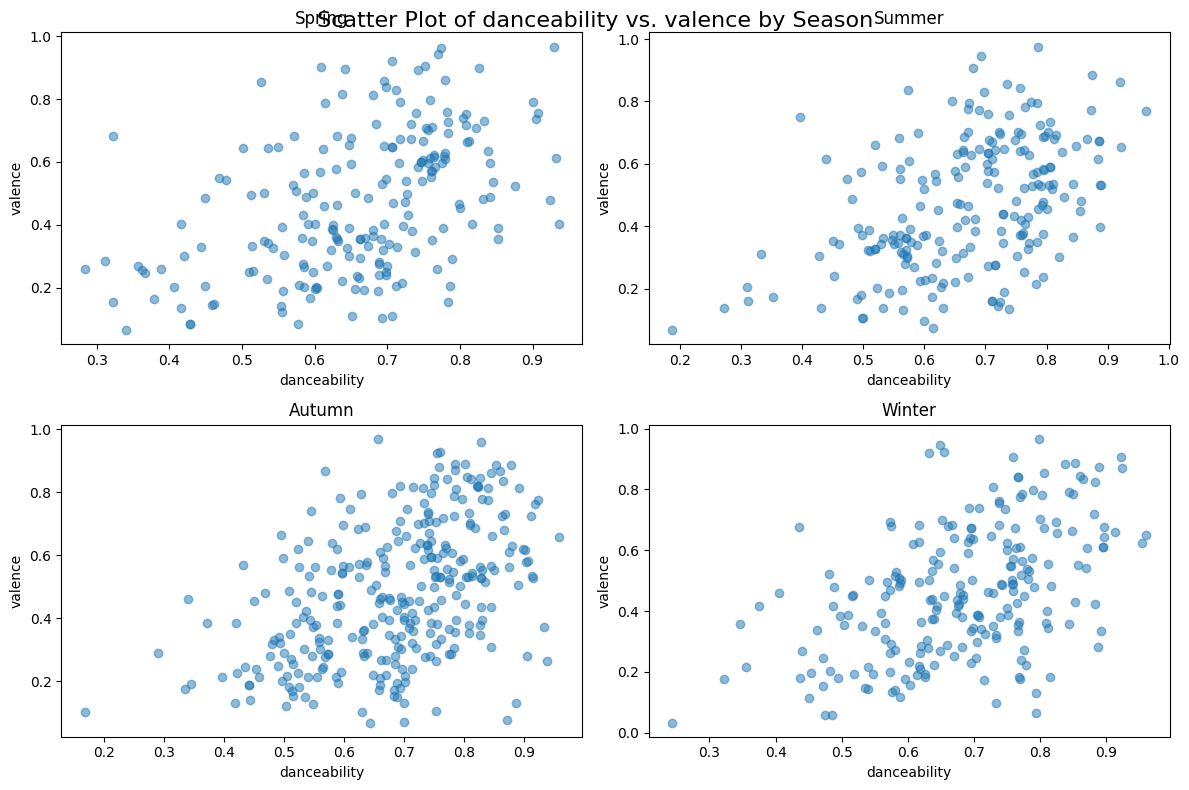

In [55]:
# Sử dụng hàm với dữ liệu và tên các biến x, y, và cột thời gian
scatter_season_plot(df_vn_features, 'danceability', 'valence')

#### Phân tích phân phối Key

In [56]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
# Chuyển khóa từ số sang chữ
key_mapping = {
    0: "C", 1: "C♯,D♭", 2: "D",3: "D♯,E♭", 4: "E",
    5: "F", 6: "F♯,G♭", 7: "G", 8: "G♯,A♭",9: "A",
    10: "A♯,B♭", 11: "B"
}

df_vn_features['key_mapping'] = df_vn_features['key'].map(key_mapping)
df_vn_features['key_mapping']

0      F♯,G♭
1          A
2          A
3          F
4      D♯,E♭
       ...  
933        E
934    D♯,E♭
935        F
936    F♯,G♭
937        D
Name: key_mapping, Length: 938, dtype: object

In [57]:
# Tính số lần xuất hiện của mỗi khóa
song_keys = df_vn_features['key_mapping'].value_counts().reset_index()
song_keys.columns = ['key_mapping', 'n_key']
# Sắp xếp theo số lần xuất hiện giảm dần
song_keys = song_keys.sort_values(by='n_key', ascending=False)
song_keys

,key_mapping,n_key
0,F,106
1,C,104
2,"C♯,D♭",98
3,D,93
4,A,90
5,G,85
6,"G♯,A♭",79
7,B,66
8,"A♯,B♭",64
9,"F♯,G♭",63


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the foll

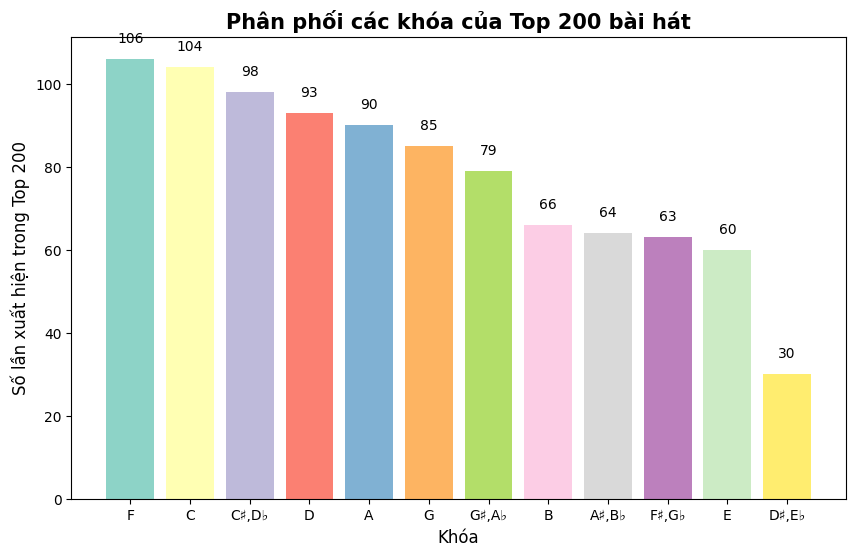

In [58]:

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
ax = plt.subplot(1, 1, 1)
plt.bar(song_keys['key_mapping'], song_keys['n_key'], color = plt.cm.Set3(np.arange(12)))
plt.title("Phân phối các khóa của Top 200 bài hát", size=15, fontweight='bold')
plt.xlabel("Khóa", size=12)
plt.ylabel("Số lần xuất hiện trong Top 200", size=12)

# Thêm số lần xuất hiện lên cột
for i in range(len(song_keys)):
    plt.text(i, song_keys['n_key'].iloc[i] + 5, str(song_keys['n_key'].iloc[i]), ha='center', va='center')

plt.show()